# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [1]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# Load all datasets
customers = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Customers.csv')
orders = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Orders.csv')
items = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Items.csv')
products = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Products.csv')
stores = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Stores.csv')
supplies = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Supplies.csv')

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [5]:
# Q1.1: Calculate total revenue

total_revenue = orders['order_total'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $66,038,193.00


In [6]:
# Q1.2: Revenue by store location

revenue_by_store = orders.join(stores, left_on='store_id', right_on='id').group_by('name').agg(pl.col('order_total').sum())
print(revenue_by_store)

shape: (2, 2)
┌──────────────┬─────────────┐
│ name         ┆ order_total │
│ ---          ┆ ---         │
│ str          ┆ i64         │
╞══════════════╪═════════════╡
│ Philadelphia ┆ 43215565    │
│ Brooklyn     ┆ 22822628    │
└──────────────┴─────────────┘


In [4]:
# Q1.3: Monthly revenue trends

# Convert 'ordered_at' to datetime
orders = orders.with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S"))
# Have taken this string out as code says that orders was already adjusted for date/time

# Group by
monthly_revenue_trends = orders.group_by(pl.col("ordered_at").dt.year().alias("year"), pl.col("ordered_at").dt.month().alias("month")).agg(
    pl.col("order_total").sum().alias("monthly_revenue")
).sort(["year", "month"])

#percentage change
monthly_revenue_trends = monthly_revenue_trends.with_columns(
    pl.col("monthly_revenue").pct_change().alias("monthly_revenue_change")
)

print(monthly_revenue_trends)

shape: (12, 4)
┌──────┬───────┬─────────────────┬────────────────────────┐
│ year ┆ month ┆ monthly_revenue ┆ monthly_revenue_change │
│ ---  ┆ ---   ┆ ---             ┆ ---                    │
│ i32  ┆ i8    ┆ i64             ┆ f64                    │
╞══════╪═══════╪═════════════════╪════════════════════════╡
│ 2016 ┆ 9     ┆ 1644922         ┆ null                   │
│ 2016 ┆ 10    ┆ 1956651         ┆ 0.18951                │
│ 2016 ┆ 11    ┆ 2552662         ┆ 0.304608               │
│ 2016 ┆ 12    ┆ 3307337         ┆ 0.295642               │
│ 2017 ┆ 1     ┆ 3821291         ┆ 0.155398               │
│ …    ┆ …     ┆ …               ┆ …                      │
│ 2017 ┆ 4     ┆ 7392014         ┆ 0.117959               │
│ 2017 ┆ 5     ┆ 8469909         ┆ 0.145819               │
│ 2017 ┆ 6     ┆ 8617148         ┆ 0.017384               │
│ 2017 ┆ 7     ┆ 8585320         ┆ -0.003694              │
│ 2017 ┆ 8     ┆ 9332296         ┆ 0.087006               │
└──────┴───────┴─────────

shape: (7, 3)
┌─────────────┬───────────────┬───────────┐
│ day_of_week ┆ daily_revenue ┆ day_name  │
│ ---         ┆ ---           ┆ ---       │
│ i8          ┆ i64           ┆ str       │
╞═════════════╪═══════════════╪═══════════╡
│ 1           ┆ 10611971      ┆ Monday    │
│ 2           ┆ 10814455      ┆ Tuesday   │
│ 3           ┆ 10834569      ┆ Wednesday │
│ 4           ┆ 10829195      ┆ Thursday  │
│ 5           ┆ 10758715      ┆ Friday    │
│ 6           ┆ 5981489       ┆ Saturday  │
│ 7           ┆ 6207799       ┆ Sunday    │
└─────────────┴───────────────┴───────────┘


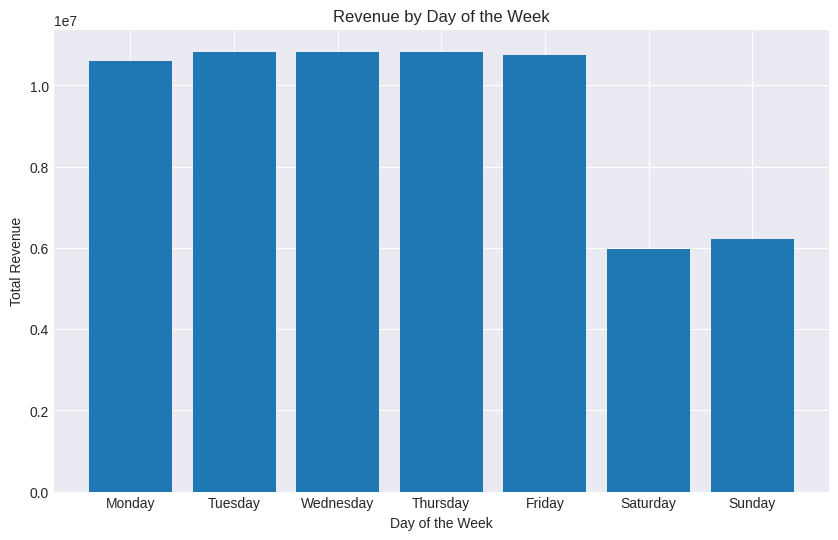

In [9]:
# Q1.4: Revenue by day of week

# Calculate revenue by day of week
revenue_by_day_of_week = orders.group_by(pl.col("ordered_at").dt.weekday().alias("day_of_week")).agg(
    pl.col("order_total").sum().alias("daily_revenue")
).sort("day_of_week")

# Map weekday number to name for better readability
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day_of_week = revenue_by_day_of_week.with_columns(
    pl.col("day_of_week").map_elements(lambda x: day_names[x - 1], return_dtype=pl.Utf8).alias("day_name")
).sort("day_of_week")

print(revenue_by_day_of_week)

# Plot revenue by day of week
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_day_of_week["day_name"], revenue_by_day_of_week["daily_revenue"])
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.title("Revenue by Day of the Week")
plt.show()

## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

=== Revenue Mix by Category ===
shape: (2, 3)
┌──────────┬──────────┬───────────┐
│ type     ┆ revenue  ┆ pct       │
│ ---      ┆ ---      ┆ ---       │
│ str      ┆ i64      ┆ f64       │
╞══════════╪══════════╪═══════════╡
│ beverage ┆ 39836200 ┆ 63.517286 │
│ jaffle   ┆ 22880900 ┆ 36.482714 │
└──────────┴──────────┴───────────┘


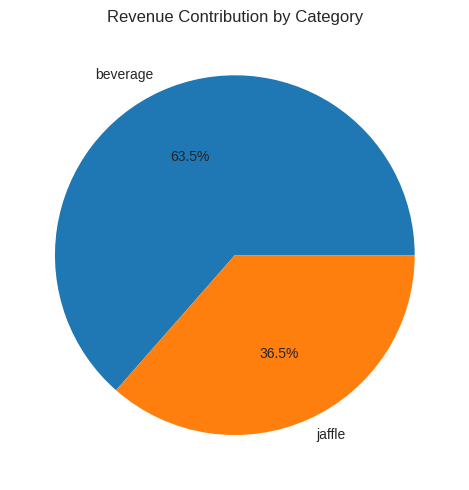

In [8]:
#Q2.1: Revenue by product category

items_with_type = (
    items
    .join(products.select(["sku", "type", "price"]), on="sku", how="left")
    .with_columns((pl.col("price")).alias("line_revenue"))
)

# Revenue by category (e.g., 'Beverage', 'Jaffle')
category_mix = (
    items_with_type
    .group_by("type")
    .agg(pl.sum("line_revenue").alias("revenue"))
    .sort("revenue", descending=True)
    .with_columns((pl.col("revenue") / pl.col("revenue").sum() * 100).alias("pct"))
)

print("=== Revenue Mix by Category ===")
print(category_mix)

# Pie chart
plt.figure(figsize=(6,5))
plt.pie(
    category_mix["revenue"].to_list(),
    labels=category_mix["type"].to_list(),
    autopct="%1.1f%%"
)
plt.title("Revenue Contribution by Category")
plt.tight_layout()
plt.show()

In [10]:
# Q2.2 Average price of products by type
average_price_by_type = products.group_by('type').agg(pl.col('price').mean())

print(average_price_by_type)

shape: (2, 2)
┌──────────┬────────┐
│ type     ┆ price  │
│ ---      ┆ ---    │
│ str      ┆ f64    │
╞══════════╪════════╡
│ beverage ┆ 560.0  │
│ jaffle   ┆ 1200.0 │
└──────────┴────────┘


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

revenue_per_day_by_store:
 shape: (2, 5)
┌───────────────────────────────┬──────────────┬─────────────────┬───────────────┬─────────────────┐
│ store_id                      ┆ name         ┆ days_since_open ┆ total_revenue ┆ revenue_per_day │
│ ---                           ┆ ---          ┆ ---             ┆ ---           ┆ ---             │
│ str                           ┆ str          ┆ i64             ┆ i64           ┆ f64             │
╞═══════════════════════════════╪══════════════╪═════════════════╪═══════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e984 ┆ Brooklyn     ┆ 173             ┆ 22822628      ┆ 131922.705202   │
│ 9…                            ┆              ┆                 ┆               ┆                 │
│ a9128331-08d7-41a2-b615-21283 ┆ Philadelphia ┆ 365             ┆ 43215565      ┆ 118398.808219   │
│ e…                            ┆              ┆                 ┆               ┆                 │
└───────────────────────────────┴──────────────┴──

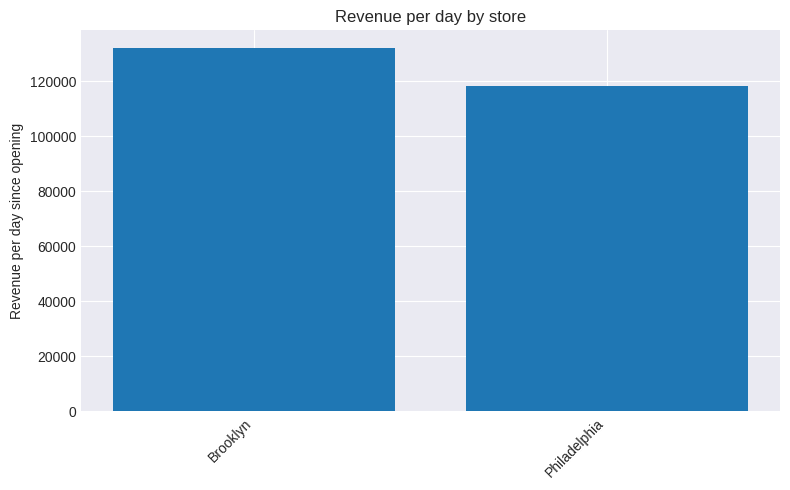

In [11]:
# Q3.1: Revenue per day since opening by store

# Pick tax column name present in your stores table
tax_col = "local_tax_rate" if "local_tax_rate" in stores.columns else "tax_rate"

# Join orders + Store frame
stores_min = stores.select(
    pl.col("id").alias("store_id"),
    "name",
    pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S", strict=False).alias("opened_at"),
    pl.col(tax_col).alias("local_tax_rate"),
)

od = orders.join(stores_min, on="store_id", how="left")

# Aggregate and workout revenue per store since opening
agg = od.group_by(["store_id", "name", "opened_at", "local_tax_rate"]).agg(
    pl.sum("order_total").alias("total_revenue"),
    pl.max("ordered_at").alias("last_order_date"),
)

revenue_per_day_by_store = (
    agg.with_columns(
        ((pl.col("last_order_date") - pl.col("opened_at")).dt.total_days().alias("days_since_open_raw"))
    )
    .with_columns(
       pl.when(pl.col("days_since_open_raw") < 0).then(0).otherwise(pl.col("days_since_open_raw")).cast(pl.Int64).alias("days_since_open")
    )
    .with_columns(
        (pl.col("days_since_open") + 1).alias("days_since_open")
    )
    .with_columns((pl.col("total_revenue") / pl.col("days_since_open")).alias("revenue_per_day"))
    .select("store_id", "name", "days_since_open", "total_revenue", "revenue_per_day")
    .sort("revenue_per_day", descending=True)
)

#Chart Coding
plt.figure(figsize=(8, 5))
plt.bar(revenue_per_day_by_store["name"].to_list(), revenue_per_day_by_store["revenue_per_day"].to_list())
plt.ylabel("Revenue per day since opening")
plt.title("Revenue per day by store")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

print("revenue_per_day_by_store:\n", revenue_per_day_by_store)

Brooklyn actual (4.00%): 126,848.76
Brooklyn @ 6%: 124,455.38
Philadelphia actual: 111,696.99


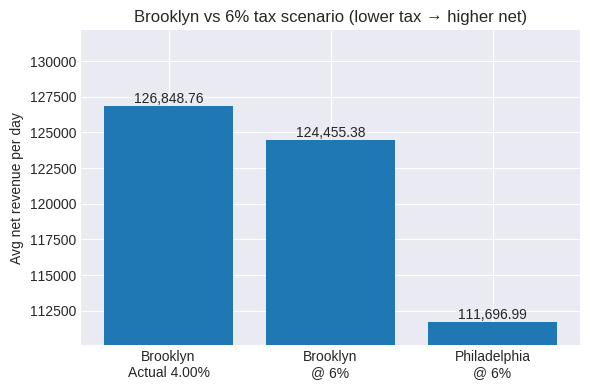

In [12]:
# Q3.2: Tax rates vs store performance

# Tax vs Performance
tax_rate_performance = revenue_per_day_by_store.join(agg.select('store_id', 'local_tax_rate'), on='store_id', how='left').select(
    "store_id", "name", "local_tax_rate", "revenue_per_day"
).drop_nulls(["local_tax_rate"])

TARGET_TAX = 0.06

# Find Brooklyn & Philadelphia rows
base = (
    tax_rate_performance
    .drop_nulls(["store_id", "name", "local_tax_rate"])
    .select(
        "store_id",
        pl.col("name"),
        pl.col("local_tax_rate").cast(pl.Float64).alias("tax"),
    )
)

bk = base.filter(pl.col("name").str.to_lowercase().str.contains("brooklyn", literal=True)).head(1)
ph = base.filter(pl.col("name").str.to_lowercase().str.contains("philadelphia", literal=True)).head(1)

if bk.height == 0:
    raise RuntimeError("Brooklyn store not found in tax_rate_performance")
if ph.height == 0:
    print("[warn] Philadelphia store not found; plotting Brooklyn only")

bk_id, bk_name, bk_tax = bk.row(0)

def daily_gross_for(store_id: int | str) -> pl.DataFrame:
    return (
        orders
        .with_columns(pl.col("ordered_at").cast(pl.Datetime, strict=False).alias("ordered_at"))
        .filter(pl.col("store_id") == store_id)
        .with_columns(pl.col("ordered_at").dt.date().alias("d"))
        .group_by("d").agg(pl.sum("order_total").alias("gross"))
    )

bk_daily = daily_gross_for(bk_id)

# Brooklyn: actual vs hypothetical @ 6%
bk_actual = float(bk_daily.select((pl.col("gross") / (1.0 + bk_tax)).mean()).item())
bk_at6    = float(bk_daily.select((pl.col("gross") / (1.0 + TARGET_TAX)).mean()).item())

labels = [f"{bk_name}\nActual {bk_tax:.2%}", f"{bk_name}\n@ 6%"]
vals   = [bk_actual, bk_at6]

# Philadelphia @ 6% (actual or normalized to 6%)
if ph.height:
    ph_id, ph_name, ph_tax = ph.row(0)
    ph_daily = daily_gross_for(ph_id)
    ph_at6   = float(ph_daily.select((pl.col("gross") / (1.0 + TARGET_TAX)).mean()).item())
    labels.append(f"{ph_name}\n@ 6%")
    vals.append(ph_at6)

# Plot (slightly zoomed out)
plt.figure(figsize=(6, 4))
plt.bar(labels, vals)
for i, v in enumerate(vals):
    plt.text(i, v, f"{v:,.2f}", ha="center", va="bottom")
plt.ylabel("Avg net revenue per day")
plt.title(f"Brooklyn vs 6% tax scenario (lower tax → higher net)")

# dynamic y-limits with modest padding
y_min, y_max = min(vals), max(vals)
if y_max == y_min:
    pad = (y_max * 0.25) if y_max else 1.0
else:
    pad = (y_max - y_min) * 0.35
lower = max(0, y_min - pad * 0.3)
upper = y_max + pad
plt.ylim(lower, upper)

plt.tight_layout()

# Formatting
print(f"Brooklyn actual ({bk_tax:.2%}): {bk_actual:,.2f}")
print(f"Brooklyn @ 6%: {bk_at6:,.2f}")
if ph.height:
    print(f"Philadelphia actual: {ph_at6:,.2f}")

## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

In [13]:
# Q4.1: Distribution of order values

order_value_distribution = orders['order_total'].describe()
print(order_value_distribution)

#print the standard deviation of order_total
order_total_std = orders['order_total'].std()
print(f"\nStandard Deviation of Order Total: ${order_total_std:,.2f}")

shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 63148.0     │
│ null_count ┆ 0.0         │
│ mean       ┆ 1045.76856  │
│ std        ┆ 1025.930713 │
│ min        ┆ 0.0         │
│ 25%        ┆ 530.0       │
│ 50%        ┆ 636.0       │
│ 75%        ┆ 1165.0      │
│ max        ┆ 10281.0     │
└────────────┴─────────────┘

Standard Deviation of Order Total: $1,025.93


In [14]:
# Q4.2: Repeat customers analysis

# Group orders by customer and count the number of orders for each customer
customer_order_counts = orders.group_by('customer').agg(pl.len().alias('order_count'))

# Filter for customers with more than one order (repeat customers)
repeat_customers = customer_order_counts.filter(pl.col('order_count') > 1)

# Count the number of repeat customers
repeat_customer_analysis = repeat_customers.shape[0]

print(f"Number of repeat customers: {repeat_customer_analysis}")

Number of repeat customers: 920


In [15]:
# Q4.3: Top revenue contributors


# Join orders and customers
orders_with_customers = orders.join(customers, left_on='customer', right_on='id')

# Group by customer and sum order total
customer_revenue = orders_with_customers.group_by('customer', 'name').agg(
    pl.col('order_total').sum().alias('total_spent')
)

# Rank customers by total spent
top_revenue_customers = customer_revenue.sort('total_spent', descending=True).with_columns(
    pl.col('total_spent').rank(method='max', descending=True).alias('rank')
)

print(top_revenue_customers)

shape: (930, 4)
┌─────────────────────────────────┬─────────────────┬─────────────┬──────┐
│ customer                        ┆ name            ┆ total_spent ┆ rank │
│ ---                             ┆ ---             ┆ ---         ┆ ---  │
│ str                             ┆ str             ┆ i64         ┆ u32  │
╞═════════════════════════════════╪═════════════════╪═════════════╪══════╡
│ ea3ada4c-8ffa-4e73-a51f-27711f… ┆ David Leonard   ┆ 262647      ┆ 1    │
│ 4fb3b92c-29cc-410f-a898-9784c4… ┆ Jesse Moore     ┆ 259037      ┆ 2    │
│ 99facd33-7b11-4955-aa0d-ccd118… ┆ Diane Davis     ┆ 258515      ┆ 3    │
│ 8bbf796d-0862-41c6-b533-38d6c2… ┆ Holly Johnson   ┆ 252703      ┆ 4    │
│ bc94ad77-6703-48d9-85d9-7908e7… ┆ Gregory Hayes   ┆ 249821      ┆ 5    │
│ …                               ┆ …               ┆ …           ┆ …    │
│ 8482b1c8-b296-463b-9abc-143e53… ┆ Aimee Kennedy   ┆ 1768        ┆ 927  │
│ dc7755a1-38b3-4b3e-a7c0-1bea55… ┆ Dana Hensley    ┆ 1768        ┆ 927  │
│ 70489c3

## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [16]:
# Q5.1: Calculate gross margin per product

# Join products and supplies dataframes
products_with_supplies = products.join(supplies, left_on='sku', right_on='sku', how='inner')

# Group by product and sum the supply costs for each product
product_costs = products_with_supplies.group_by('sku', 'name', 'price').agg(
    pl.col('cost').sum().alias('total_supply_cost')
)

# Calculate the gross margin per product and gross margin percentage
product_margins = product_costs.with_columns([
    (pl.col('price') - pl.col('total_supply_cost')).alias('gross_margin'),
    #(((pl.col('price') - pl.col('total_supply_cost')) / pl.col('price')) * 100).alias('gross_margin_percentage')
])

# Adding a percentage column
product_margins = product_costs.with_columns([
    (pl.col("price") - pl.col("total_supply_cost")).alias("gross_margin"),
    pl.when(pl.col("price").cast(pl.Float64) > 0)
      .then(((pl.col("price") - pl.col("total_supply_cost")) / pl.col("price")) * 100)
      .otherwise(None)
      .alias("gross_margin_percentage")
])

print(product_margins)

shape: (10, 6)
┌─────────┬──────────────────┬───────┬───────────────────┬──────────────┬──────────────────────────┐
│ sku     ┆ name             ┆ price ┆ total_supply_cost ┆ gross_margin ┆ gross_margin_percentage  │
│ ---     ┆ ---              ┆ ---   ┆ ---               ┆ ---          ┆ ---                      │
│ str     ┆ str              ┆ i64   ┆ i64               ┆ i64          ┆ f64                      │
╞═════════╪══════════════════╪═══════╪═══════════════════╪══════════════╪══════════════════════════╡
│ BEV-001 ┆ tangaroo         ┆ 600   ┆ 82                ┆ 518          ┆ 86.333333                │
│ JAF-001 ┆ nutellaphone who ┆ 1100  ┆ 121               ┆ 979          ┆ 89.0                     │
│         ┆ dis?             ┆       ┆                   ┆              ┆                          │
│ BEV-003 ┆ vanilla ice      ┆ 600   ┆ 154               ┆ 446          ┆ 74.333333                │
│ JAF-003 ┆ the krautback    ┆ 1200  ┆ 366               ┆ 834          ┆ 69

In [17]:
# Q5.2: Products with highest profit margins

products_with_supplies = products.join(supplies, on="sku", how="inner")

# 2) Group by product and sum supply costs (SKU + name + price)
product_costs = products_with_supplies.group_by(["sku", "name", "price"]).agg(
pl.col("cost").sum().alias("total_supply_cost")
)


# 3) Margins per product (absolute and percentage)
product_margins = (
product_costs
.with_columns([
(pl.col("price") - pl.col("total_supply_cost")).alias("gross_margin_abs"),
pl.when(pl.col("price").cast(pl.Float64) > 0)
.then(((pl.col("price") - pl.col("total_supply_cost")) / pl.col("price")) * 100)
.otherwise(None)
.alias("gross_margin_percentage"),
])
)


# 4) Highest margin products, ranked by percentage
highest_margin_products = (
product_margins
.sort("gross_margin_percentage", descending=True)
.with_columns(pl.col("gross_margin_percentage").rank(method="dense", descending=True).alias("rank"))
.select(["sku", "name", "gross_margin_percentage", "gross_margin_abs", "rank"])
)


print(highest_margin_products.head)

<bound method DataFrame.head of shape: (10, 5)
┌─────────┬─────────────────────────┬─────────────────────────┬──────────────────┬──────┐
│ sku     ┆ name                    ┆ gross_margin_percentage ┆ gross_margin_abs ┆ rank │
│ ---     ┆ ---                     ┆ ---                     ┆ ---              ┆ ---  │
│ str     ┆ str                     ┆ f64                     ┆ i64              ┆ u32  │
╞═════════╪═════════════════════════╪═════════════════════════╪══════════════════╪══════╡
│ JAF-001 ┆ nutellaphone who dis?   ┆ 89.0                    ┆ 979              ┆ 1    │
│ BEV-004 ┆ for richer or pourover  ┆ 88.285714               ┆ 618              ┆ 2    │
│ BEV-001 ┆ tangaroo                ┆ 86.333333               ┆ 518              ┆ 3    │
│ BEV-005 ┆ adele-ade               ┆ 84.25                   ┆ 337              ┆ 4    │
│ JAF-005 ┆ mel-bun                 ┆ 80.083333               ┆ 961              ┆ 5    │
│ JAF-002 ┆ doctor stew             ┆ 77.181818      

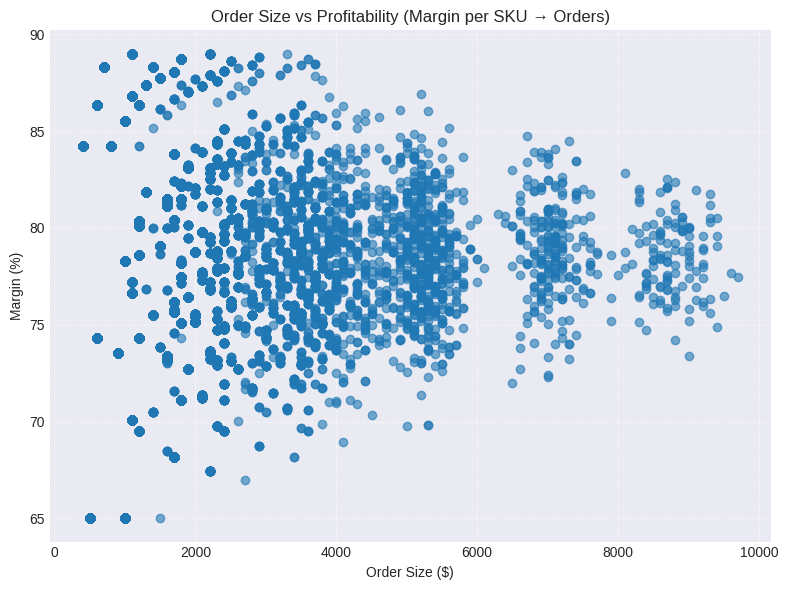

In [18]:
# Q5.3: Order size vs profitability
# Your code here
# Q5.3: Order size vs profitability

supplies_total = (
supplies
.group_by("sku")
.agg(pl.sum("cost").alias("TotalSupplyCost"))
)


# Join Products (price) with TotalSupplyCost to get UNIT margin per SKU
sku_margin = (
products
.select(["sku", "price"]) # keep only needed columns
.join(supplies_total, on="sku", how="left")
.with_columns([
(pl.col("price") - pl.col("TotalSupplyCost")).alias("UnitMargin"),
(pl.when(pl.col("price") > 0)
.then((pl.col("price") - pl.col("TotalSupplyCost")) / pl.col("price") * 100)
.otherwise(None)
).alias("UnitMarginPct")
])
)


# peek
# print(sku_margin.head())


# 4) Join Items with SKU margin to attribute per-line profit and revenue
order_items = (
items
.join(sku_margin.select(["sku", "price", "UnitMargin"]), on="sku", how="left")
.with_columns([
(pl.col("price")).alias("LineRevenue"),
(pl.col("UnitMargin")).alias("LineProfit"),
])
)


# 5) Aggregate to order level: TotalRevenue, TotalProfit, and Margin%
order_summary = (
order_items
.group_by("order_id")
.agg([
pl.sum("LineRevenue").alias("TotalRevenue"),
pl.sum("LineProfit").alias("TotalProfit"),
])
.with_columns(
(pl.when(pl.col("TotalRevenue") > 0)
.then(pl.col("TotalProfit") / pl.col("TotalRevenue") * 100)
.otherwise(None)
).alias("MarginPercent")
)
)


# (Optional) peek
# print(order_summary.head())


# 6) Plot: Order Size vs Profitability
plt.figure(figsize=(8,6))
plt.scatter(order_summary["TotalRevenue"].to_list(),
order_summary["MarginPercent"].to_list(),
alpha=0.6)
plt.xlabel("Order Size ($)")
plt.ylabel("Margin (%)")
plt.title("Order Size vs Profitability (Margin per SKU → Orders)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


=== Margin per store (with names) ===
shape: (2, 5)
┌───────────────────────────────┬──────────────┬───────────────────┬──────────────┬────────────────┐
│ store_id                      ┆ name         ┆ StoreMarginAmount ┆ StoreRevenue ┆ StoreMarginPct │
│ ---                           ┆ ---          ┆ ---               ┆ ---          ┆ ---            │
│ str                           ┆ str          ┆ i64               ┆ i64          ┆ f64            │
╞═══════════════════════════════╪══════════════╪═══════════════════╪══════════════╪════════════════╡
│ a9128331-08d7-41a2-b615-21283 ┆ Philadelphia ┆ 32358060          ┆ 40772200     ┆ 79.363046      │
│ e…                            ┆              ┆                   ┆              ┆                │
│ a2a24e87-dec8-4f5d-9c9e-0e984 ┆ Brooklyn     ┆ 17408441          ┆ 21944900     ┆ 79.327958      │
│ 9…                            ┆              ┆                   ┆              ┆                │
└───────────────────────────────┴─────

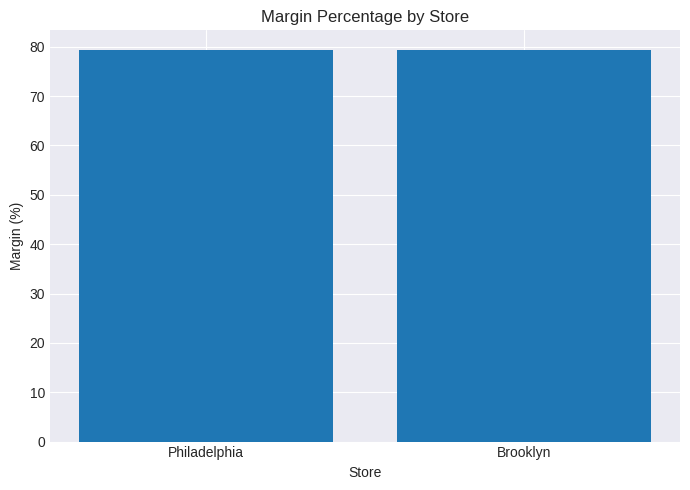

In [20]:
# Q5.4: Profitability by store
# Your code here
supplies_total = (
supplies
.group_by("sku")
.agg(pl.sum("cost").alias("TotalSupplyCost"))
)


# 3) One price per sku -> UnitPrice
products_one = (
products
.group_by("sku")
.agg(pl.first("price").alias("UnitPrice"))
)


# 4) Per-SKU margin (amount); keep UnitPrice so we can compute revenue later
sku_margin = (
products_one
.join(supplies_total, on="sku", how="left")
.with_columns((pl.col("UnitPrice") - pl.col("TotalSupplyCost")).alias("UnitMargin"))
)


# 5) Items with margin and revenue per line
items_with_margin = (
items
.join(sku_margin.select(["sku", "UnitMargin", "UnitPrice"]), on="sku", how="left")
.with_columns([
(pl.col("UnitMargin")).alias("LineMargin"),
(pl.col("UnitPrice")).alias("LineRevenue"),
])
)


# 6) Aggregate margin per order_id (and revenue for % later)
order_totals = (
items_with_margin
.group_by("order_id")
.agg([
pl.sum("LineMargin").alias("margin_of_order"),
pl.sum("LineRevenue").alias("revenue_of_order"),
])
)


# 7) Join Orders (id) with order_totals (order_id) to get store_id on each order
orders_with_totals = orders.join(order_totals, left_on="id", right_on="order_id", how="left")


# 8) Aggregate per store_id (amount and revenue)
store_rollup = (
orders_with_totals
.with_columns([
pl.col("margin_of_order").fill_null(0),
pl.col("revenue_of_order").fill_null(0),
])
.group_by("store_id")
.agg([
pl.sum("margin_of_order").alias("StoreMarginAmount"),
pl.sum("revenue_of_order").alias("StoreRevenue"),
])
.with_columns((pl.col("StoreMarginAmount") / pl.col("StoreRevenue") * 100).alias("StoreMarginPct"))
)


# 9) Join with stores to replace store_id with store_name
store_summary = (
store_rollup
.join(stores, left_on="store_id", right_on="id", how="left")
.select(["store_id", "name", "StoreMarginAmount", "StoreRevenue", "StoreMarginPct"])
.sort("StoreRevenue", descending=True)
)

print("\n=== Margin per store (with names) ===")
print(store_summary)

#Margin PERCENT by store (bar chart)
plt.figure(figsize=(7,5))
plt.bar(store_summary["name"].to_list(), store_summary["StoreMarginPct"].to_list())
plt.xlabel("Store")
plt.ylabel("Margin (%)")
plt.title("Margin Percentage by Store")
plt.tight_layout()
plt.show()


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1: Tailor Promotions to Weekday and Weekend Demand.


Weekday beverage sales are significantly higher, suggesting an opportunity to bundle beverages with high-margin jaffles.

On weekends, foot traffic declines and group visits become more important. To attract these customers, Jaffle should offer larger bundle discounts.


=== Weekday Product Mix by Revenue ===
shape: (2, 2)
┌──────────┬──────────┐
│ type     ┆ revenue  │
│ ---      ┆ ---      │
│ str      ┆ i64      │
╞══════════╪══════════╡
│ jaffle   ┆ 12646400 │
│ beverage ┆ 28280000 │
└──────────┴──────────┘
=== Weekend Product Mix by Revenue ===
shape: (2, 2)
┌──────────┬──────────┐
│ type     ┆ revenue  │
│ ---      ┆ ---      │
│ str      ┆ i64      │
╞══════════╪══════════╡
│ beverage ┆ 11556200 │
│ jaffle   ┆ 10234500 │
└──────────┴──────────┘


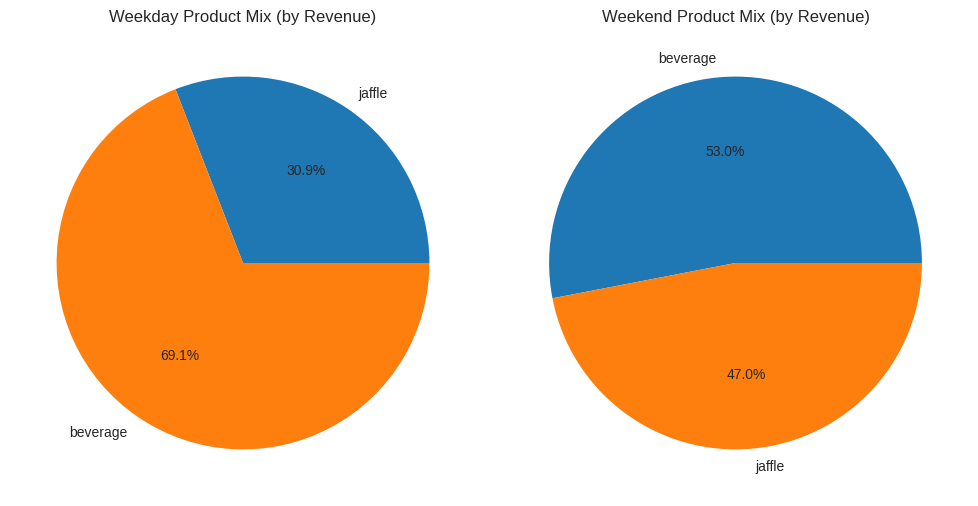

In [21]:
# Supporting analysis for Recommendation 1

# 1) Join items with products to get category (type)
items_with_type = items.join(products.select(["sku", "type", "price"]), on="sku", how="left")


# 2) Compute line revenue
items_with_type = items_with_type.with_columns(
(pl.col("price")).alias("line_revenue")
)


# 3) Join with orders to bring in ordered_at
data = items_with_type.join(orders.select(["id", "ordered_at"]), left_on="order_id", right_on="id", how="left")


# 4) Extract weekday/weekend
data = data.with_columns(
(pl.col("ordered_at").dt.weekday() < 5).alias("is_weekday")
)


# 5) Aggregate revenue by category for weekday
weekday_mix = (
data.filter(pl.col("is_weekday"))
.group_by("type")
.agg(pl.sum("line_revenue").alias("revenue"))
)


# 6) Aggregate revenue by category for weekend
weekend_mix = (
data.filter(~pl.col("is_weekday"))
.group_by("type")
.agg(pl.sum("line_revenue").alias("revenue"))
)

print("=== Weekday Product Mix by Revenue ===")
print(weekday_mix)


print("=== Weekend Product Mix by Revenue ===")
print(weekend_mix)


# 7) Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(10,5))




# Weekday pie chart
axes[0].pie(weekday_mix["revenue"].to_list(), labels=weekday_mix["type"].to_list(), autopct='%1.1f%%')
axes[0].set_title("Weekday Product Mix (by Revenue)")


# Weekend pie chart
axes[1].pie(weekend_mix["revenue"].to_list(), labels=weekend_mix["type"].to_list(), autopct='%1.1f%%')
axes[1].set_title("Weekend Product Mix (by Revenue)")


plt.tight_layout()
plt.show()

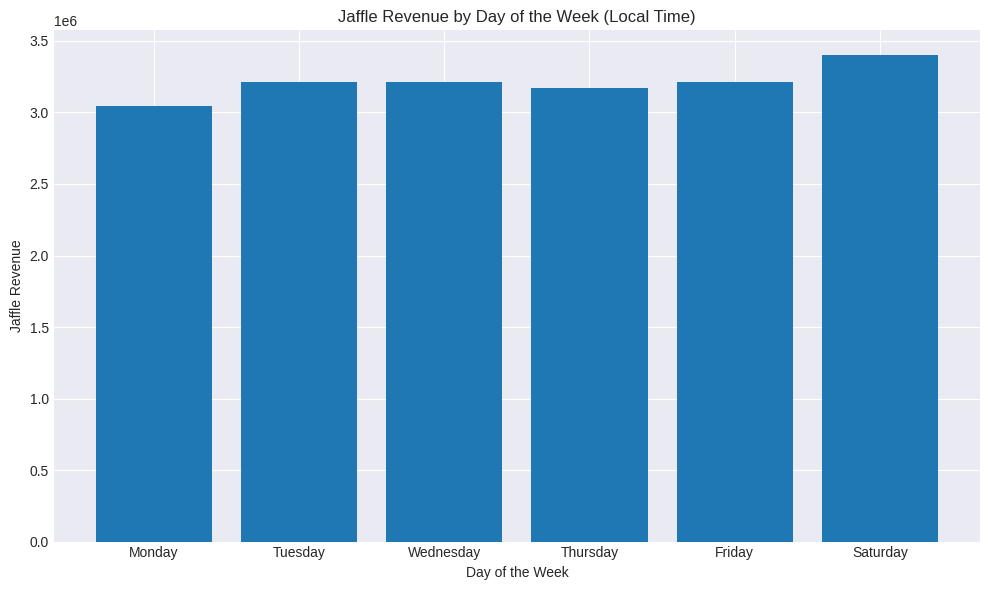

In [22]:
# 1) Make sure dtypes are correct and compute true revenue
# Make a local timestamp column first
data = data.with_columns(
    pl.col("ordered_at")
      .cast(pl.Datetime, strict=False)
      .dt.replace_time_zone("UTC")                  # assume stored in UTC
      .dt.convert_time_zone("America/New_York")     # convert to local tz
      .alias("ordered_local")
)

# Use local time to compute weekday and day name
jaffle_by_day = (
    data
    .filter(pl.col("type").str.to_lowercase() == "jaffle")  # robust match
    .with_columns([
        pl.col("ordered_local").dt.weekday().alias("weekday"),          # 0=Mon..6=Sun
        pl.col("ordered_local").dt.strftime("%A").alias("day_name"),
        (pl.col("price").cast(pl.Float64, strict=False).fill_null(0)).alias("line_revenue")
    ])
    .group_by(["weekday","day_name"])
    .agg(pl.sum("line_revenue").alias("jaffle_revenue"))
    .sort("weekday")
)

# Ensure all 7 days appear (fill missing with 0) and plot
weekday_full = pl.DataFrame({"weekday": list(range(7))})
jaffle_by_day = (
    weekday_full
    .join(jaffle_by_day, on="weekday", how="left")
    .with_columns([
        pl.col("jaffle_revenue").fill_null(0),
        pl.col("day_name").fill_null(
            pl.when(pl.col("weekday")==0).then(pl.lit("Monday"))
             .when(pl.col("weekday")==1).then(pl.lit("Tuesday"))
             .when(pl.col("weekday")==2).then(pl.lit("Wednesday"))
             .when(pl.col("weekday")==3).then(pl.lit("Thursday"))
             .when(pl.col("weekday")==4).then(pl.lit("Friday"))
             .when(pl.col("weekday")==5).then(pl.lit("Saturday"))
             .when(pl.col("weekday")==6).then(pl.lit("Sunday"))
             .otherwise(pl.lit("Noday"))
        )
    ])
)

plt.figure(figsize=(10,6))
plt.bar(jaffle_by_day["day_name"].to_list(), jaffle_by_day["jaffle_revenue"].to_list())
plt.xlabel("Day of the Week")
plt.ylabel("Jaffle Revenue")
plt.title("Jaffle Revenue by Day of the Week (Local Time)")
plt.tight_layout()
plt.show()

### Recommendation 2: Strengthen Loyalty Programs to Drive Retention

Customer spending is concentrated: 50% of customers generate 75% of revenue.

Retaining these core customers is critical. A tiered loyalty program should reward frequent buyers with perks.

At the same time, loyalty incentives could encourage the less-engaged 50% of customers to increase their spending.

In [23]:
# Supporting analysis for Recommendation 2

# Ensure we have customer_revenue
import math

customer_revenue = (
  orders_with_customers
  .group_by(['customer', 'name'])
  .agg(pl.col('order_total').sum().alias('total_spent'))
)

# Compute top 10% by total_spent
num_customers = customer_revenue.height
top_n = max(1, math.ceil(num_customers * 0.10))


Top10_customers = customer_revenue.sort('total_spent', descending=True).head(top_n)


top_10pct_revenue_abs = float(Top10_customers.select(pl.sum('total_spent')).item())
all_revenue = float(customer_revenue.select(pl.sum('total_spent')).item())
share_pct = (top_10pct_revenue_abs / all_revenue * 100.0) if all_revenue else None


summary_top10pct = pl.DataFrame({
'customers_total': [num_customers],
'customers_top10pct': [top_n],
'revenue_top10pct': [top_10pct_revenue_abs],
'revenue_total': [all_revenue],
'share_pct': [share_pct],
})


print(summary_top10pct)

customer_revenue = (
orders_with_customers
.group_by(['customer', 'name'])
.agg(pl.col('order_total').sum().alias('total_spent'))
)


# Sort by total_spent and compute cumulative revenue share
cr = customer_revenue.sort('total_spent', descending=True)


total_rev = float(cr.select(pl.sum('total_spent')).item())
if total_rev == 0:
  raise RuntimeError("Total revenue is zero; cannot compute shares.")


cr = cr.with_columns([
pl.col('total_spent').cum_sum().alias('cum_revenue'),
]).with_row_index('cust_rank', offset=1).with_columns([
(pl.col('cum_revenue') / total_rev).alias('cum_share'),
])

def customers_to_share(target: float) -> tuple[int, float]:
  tmp = cr.filter(pl.col('cum_share') >= target).select(
pl.min('cust_rank').alias('custs'),
pl.min('cum_share').alias('achieved_share'),
)
  if tmp.height == 0:
      return cr.height, 1.0
  row = tmp.row(0)
  return int(row[0]), float(row[1])


# Targets: 25%, 50%, 75%, 100%
q25_n, q25_share = customers_to_share(0.25)
q50_n, q50_share = customers_to_share(0.50)
q75_n, q75_share = customers_to_share(0.75)
q100_n, q100_share = customers_to_share(1.00)


quartile_cumulative = pl.DataFrame({
'target_share_pct': [25, 50, 75, 100],
'customers_needed': [q25_n, q50_n, q75_n, q100_n],
'achieved_share_pct': [q25_share*100, q50_share*100, q75_share*100, q100_share*100],
})


# Incremental counts per 25% chunk
quartile_incremental = pl.DataFrame({
'revenue_chunk': ['0–25%', '25–50%', '50–75%', '75–100%'],
'customers_in_chunk': [q25_n, q50_n - q25_n, q75_n - q50_n, q100_n - q75_n],
})


print("\nCustomers needed to reach each revenue quartile:\n", quartile_cumulative)
print("\nCustomers in each 25% revenue chunk:\n", quartile_incremental)

shape: (1, 5)
┌─────────────────┬────────────────────┬──────────────────┬───────────────┬───────────┐
│ customers_total ┆ customers_top10pct ┆ revenue_top10pct ┆ revenue_total ┆ share_pct │
│ ---             ┆ ---                ┆ ---              ┆ ---           ┆ ---       │
│ i64             ┆ i64                ┆ f64              ┆ f64           ┆ f64       │
╞═════════════════╪════════════════════╪══════════════════╪═══════════════╪═══════════╡
│ 930             ┆ 93                 ┆ 1.678362e7       ┆ 6.6137201e7   ┆ 25.376974 │
└─────────────────┴────────────────────┴──────────────────┴───────────────┴───────────┘

Customers needed to reach each revenue quartile:
 shape: (4, 3)
┌──────────────────┬──────────────────┬────────────────────┐
│ target_share_pct ┆ customers_needed ┆ achieved_share_pct │
│ ---              ┆ ---              ┆ ---                │
│ i64              ┆ i64              ┆ f64                │
╞══════════════════╪══════════════════╪════════════════════╡


### Recommendation 3: Optimize Timing of Promotions to Match Customer Visits

Customer visit analysis shows a strong morning peak of activity. We provide 3 recommendations in the executive summary to ensure a steady stream of revenue throughout the day and reduce the strain during peak hours.

=== Customers: Visits by Time of Day ===
shape: (3, 2)
┌─────────────┬────────┐
│ time_of_day ┆ visits │
│ ---         ┆ ---    │
│ str         ┆ u32    │
╞═════════════╪════════╡
│ Morning     ┆ 30015  │
│ Lunch       ┆ 18434  │
│ Afternoon   ┆ 14699  │
└─────────────┴────────┘


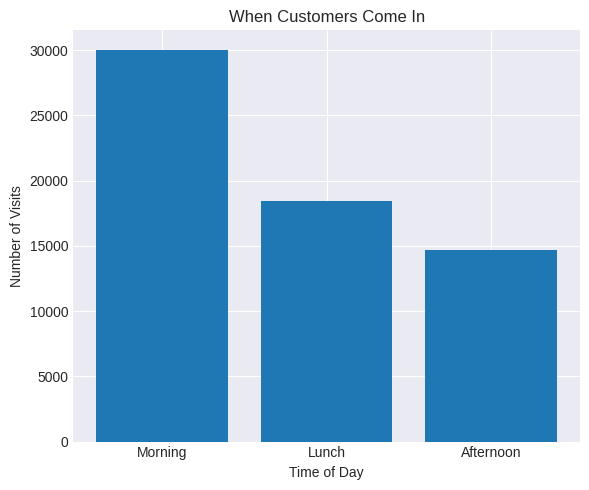

In [24]:
# More ideas

# 1) Compute total spend per customer
customer_spend = (
orders
.group_by("customer")
.agg(pl.sum("subtotal").alias("total_spend"))
.sort("total_spend", descending=True)
)


# 2) Find cutoff for top 10%(not top 10% anymore)
cutoff_index = int(len(customer_spend) * 1)
top_customers = customer_spend[:cutoff_index]["customer"].to_list()


# 3) Filter orders for only top customers
top_orders = orders.filter(pl.col("customer").is_in(top_customers))


# 4) Extract hour of day from ordered_at
top_orders = top_orders.with_columns(
pl.col("ordered_at").dt.hour().alias("hour")
)


# 5) Categorize into Morning / Lunch / Afternoon using expressions (no Python if)
top_orders = top_orders.with_columns(
pl.when(pl.col("hour") < 10).then(pl.lit("Morning"))
.when(pl.col("hour") < 14).then(pl.lit("Lunch"))
.otherwise(pl.lit("Afternoon"))
.alias("time_of_day")
)


# 6) Aggregate counts by time_of_day
time_mix = (
top_orders.group_by("time_of_day")
.agg(pl.len().alias("visits"))
.sort("time_of_day", descending=True)
)


print("=== Customers: Visits by Time of Day ===")
print(time_mix)


# 7) Plot bar chart
plt.figure(figsize=(6,5))
plt.bar(time_mix["time_of_day"].to_list(), time_mix["visits"].to_list())
plt.xlabel("Time of Day")
plt.ylabel("Number of Visits")
plt.title("When Customers Come In")
plt.tight_layout()
plt.show()

## Executive Summary

From the analysis that we have conducted into Jaffle Shop’s core business we have identified three key findings, and produced three recommendations to aid the executive team in making strategic decisions for the company’s future.

If you would like to discuss any of the findings or recommendations in more detail, then please don’t hesitate to reach out.


### Key Findings:
1.Weekday vs. Weekend revenue gap
analysis of daily revenue patterns reveals that weekend performance lags significantly behind weekday performance.

On average, weekend daily revenue is only about 55% of weekday levels. This would suggest that the majority of customers visit during the workweek, likely driven by workplace proximity and commuting patterns, rather than weekend leisure traffic.

2.Store Performance and Tax Rate Impact.
A comparison between the Brooklyn and Philadelphia stores shows that sales tax rates (4% vs. 6%) have a negligible impact on revenue.

After normalizing for tax differences, Brooklyn still outperforms Philadelphia, which is most likely explained by higher foot traffic and population density. This indicates that location-driven demand factors far outweigh tax policy in influencing sales.

3.Profitability and Margins.
Both stores maintain exceptionally strong margins of about 80%, which is highly favorable for a food-service business.

The absolute margin difference remains significant, at around $13k more per day in Brooklyn compared to Philadelphia. This gap once again reflects traffic and population advantages, not operational inefficiency, since both locations are equally effective at converting sales into profit.


### Strategic Recommendations:

1.Tailor Promotions to Weekday and Weekend Demand.

Weekday beverage sales are significantly higher, suggesting an opportunity to bundle beverages with high-margin jaffles. Since there are four jaffle products with gross margins above 75% (compared to only three beverages at that margin level), promoting “beverage + jaffle” grab-and-go deals during weekday lunch hours can both lift total revenue and increase the share of jaffle sales.
On weekends, foot traffic declines and group visits become more important. To attract these customers, Jaffle Shop should offer larger bundle discounts (e.g., 30% off for groups of four or more purchasing beverage-and-jaffle combos). This shifts the strategy: weekdays emphasize quick individual purchases, while weekends target larger group spending.

2.Strengthen Loyalty Programs to Drive Retention.

Customer spending is concentrated: 50% of customers generate 75% of revenue. Retaining these core customers is critical. A tiered loyalty program should reward frequent buyers with perks such as exclusive discounts, free add-ons, or free items after repeat purchases.
At the same time, loyalty incentives could encourage the less-engaged 50% of customers (who contribute only 25% of revenue) to increase their spending. By converting casual visitors into repeat buyers, Jaffle Shop can broaden its base while protecting its most valuable segment.

3.Optimize Timing of Promotions to Match Customer Visits.

Customer visit analysis shows a strong morning peak, likely driven by coffee demand. To maximize revenue throughout the day and reduce strain during peak hours, Jaffle Shop should:

– Maintain strong coffee offerings in the morning.

– Introduce lunch or afternoon “happy hour” deals to spread visits more evenly.

– Use time-targeted promotions to increase afternoon revenue, tapping into slower periods and lifting daily sales without overburdening staff during the busiest hours.
